### Instructions: 
- You can use our HWs, Labs, their solutions, our textbook, lecture notes, or any online source to do these problems.
- Common Piazza threads will be in radio silence during this exam. Do not post or share any codes in the piazza. 
- If you are not clear about the question, send me a private question in the piazza.
- Collaboration of any kind among students is strictly prohibited in this test. Failure to comply with all directions will subject you to disciplinary action.

In [1]:
# Useful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
#Data
data = pd.read_csv('College.csv')

Data Details: https://lse-me314.github.io/solutions/ME314_assignment1_solution.html

In [3]:
# Classification Packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Clustering Package
from sklearn.cluster import KMeans

### Problem 1 [25]
Read the details on the uploaded college data above. Change the name of the first column from 'Unnamed: 0' to 'Name'. We will use the graduation rate 'Grad.Rate' as the dependent variable. Find 8 most important numerical variables ( by using a method of your choice) that are important for the predicition of the graduation rate. Filter the original data with these 8 variables and the 'Grad.Rate'. Find the colored correlation matrix and a pairplot of these 9 variables.

In [5]:
data.rename( columns={'Unnamed: 0':'Name'}, inplace=True )
data.head(1)

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60


In [6]:
data.columns

Index(['Name', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [7]:
data.rename(columns={'Grad.Rate':'GradRate'}, inplace=True)
data.rename(columns={'S.F.Ratio':'SFRatio'}, inplace=True)
data.rename(columns={'perc.alumni':'percalumni'}, inplace=True)
data.rename(columns={'P.Undergrad':'PUndergrad'}, inplace=True)
data.rename(columns={'F.Undergrad':'FUndergrad'}, inplace=True)
data.rename(columns={'Room.Board':'RoomBoard'}, inplace=True)

data.head(1)

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60


In [8]:
numcols = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'FUndergrad', 'PUndergrad', 'Outstate', 'RoomBoard', 'Books',
       'Personal', 'PhD', 'Terminal', 'SFRatio', 'percalumni', 'Expend']

In [9]:
abs(data.corr().loc['GradRate']).nlargest(9)

GradRate      1.000000
Outstate      0.571290
Top10perc     0.494989
percalumni    0.490898
Top25perc     0.477281
RoomBoard     0.424942
Expend        0.390343
SFRatio       0.306710
PhD           0.305038
Name: GradRate, dtype: float64

In [10]:
x1 = data.drop('GradRate', axis = 1)
x2 = x1.drop('Private', axis = 1)
x = x2.drop('Name', axis = 1)
y = data['GradRate']
x.head(2)

,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527


In [17]:
x.head(2)

,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527


In [18]:
y

0      60
1      56
2      54
3      59
4      15
       ..
772    40
773    83
774    49
775    99
776    99
Name: GradRate, Length: 777, dtype: int64

In [11]:
X1 = sm.add_constant(x)
reg1 = sm.OLS(y, X1)
fit1 = reg1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GradRate   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     40.26
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           5.34e-90
Time:                        11:10:05   Log-Likelihood:                -3073.0
No. Observations:                 777   AIC:                             6180.
Df Residuals:                     760   BIC:                             6259.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.0418      4.589      8.072      0.000      28.033      46.051
Apps           0.0012      0.000      2.710      0.007       0.000       0.002
Accept        -0.0006      0.001     -0.644      0.520      -0.002       0.001
Enroll         0.0021      0.002      0.923      0.356      -0.002       0.007
Top10perc      0.0626      0.072      0.872      0.384      -0.078       0.204
Top25perc      0.1352      0.055      2.454      0.014       0.027       0.243
FUndergrad    -0.0006      0.000     -1.438      0.151      -0.001       0.000
PUndergrad    -0.0015      0.000     -3.901      0.000      -0.002      -0.001
Outstate       0.0012      0.000      5.307      0.000       0.001       0.002
RoomBoard      0.0020      0.001      3.485      0.001       0.001       0.003
Books         -0.0020      0.003     -0.694      0.488      -0.008       0.004
Personal      -0.0017      0.001     -2.167      0.031      -0.003      -0.000
PhD            0.0740      0.057      1.309      0.191      -0.037       0.185
Terminal      -0.0887      0.062     -1.430      0.153      -0.211       0.033
SFRatio        0.0262      0.158      0.166      0.868      -0.283       0.336
percalumni     0.2899      0.049      5.919      0.000       0.194       0.386
Expend        -0.0005      0.000     -3.098      0.002      -0.001      -0.000
==============================================================================
Omnibus:                       38.533   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.624
Skew:                           0.200   Prob(JB):                     8.56e-23
Kurtosis:                       4.726   Cond. No.                     1.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
x2 = x.drop("SFRatio", axis = 1)
X2 = sm.add_constant(x2)
X2.head()

,const,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,percalumni,Expend
0,1.0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,12,7041
1,1.0,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,16,10527
2,1.0,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,30,8735
3,1.0,417,349,137,60,89,510,63,12960,5450,450,875,92,97,37,19016
4,1.0,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,2,10922


In [13]:
reg2 = sm.OLS(y, X2)
fit2 = reg2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GradRate   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     42.99
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           8.11e-91
Time:                        11:10:05   Log-Likelihood:                -3073.0
No. Observations:                 777   AIC:                             6178.
Df Residuals:                     761   BIC:                             6253.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.5223      3.560     10.540      0.000      30.534      44.511
Apps           0.0012      0.000      2.729      0.007       0.000       0.002
Accept        -0.0006      0.001     -0.652      0.515      -0.002       0.001
Enroll         0.0021      0.002      0.923      0.356      -0.002       0.007
Top10perc      0.0623      0.072      0.869      0.385      -0.078       0.203
Top25perc      0.1351      0.055      2.454      0.014       0.027       0.243
FUndergrad    -0.0006      0.000     -1.431      0.153      -0.001       0.000
PUndergrad    -0.0015      0.000     -3.904      0.000      -0.002      -0.001
Outstate       0.0012      0.000      5.332      0.000       0.001       0.002
RoomBoard      0.0020      0.001      3.485      0.001       0.001       0.003
Books         -0.0020      0.003     -0.691      0.489      -0.008       0.004
Personal      -0.0017      0.001     -2.187      0.029      -0.003      -0.000
PhD            0.0747      0.056      1.328      0.185      -0.036       0.185
Terminal      -0.0888      0.062     -1.432      0.153      -0.210       0.033
percalumni     0.2893      0.049      5.929      0.000       0.193       0.385
Expend        -0.0005      0.000     -3.396      0.001      -0.001      -0.000
==============================================================================
Omnibus:                       38.605   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.039
Skew:                           0.200   Prob(JB):                     6.96e-23
Kurtosis:                       4.730   Cond. No.                     1.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
x3 = x2.drop("Accept", axis = 1)
X3 = sm.add_constant(x3)
reg3 = sm.OLS(y, X3)
fit3 = reg3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GradRate   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     46.07
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           1.44e-91
Time:                        11:10:05   Log-Likelihood:                -3073.3
No. Observations:                 777   AIC:                             6177.
Df Residuals:                     762   BIC:                             6246.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.6983      3.549     10.624      0.000      30.732      44.664
Apps           0.0010      0.000      3.808      0.000       0.000       0.001
Enroll         0.0015      0.002      0.710      0.478      -0.003       0.006
Top10perc      0.0777      0.068      1.149      0.251      -0.055       0.211
Top25perc      0.1299      0.054      2.386      0.017       0.023       0.237
FUndergrad    -0.0006      0.000     -1.399      0.162      -0.001       0.000
PUndergrad    -0.0015      0.000     -3.868      0.000      -0.002      -0.001
Outstate       0.0011      0.000      5.358      0.000       0.001       0.002
RoomBoard      0.0021      0.001      3.493      0.001       0.001       0.003
Books         -0.0020      0.003     -0.697      0.486      -0.008       0.004
Personal      -0.0017      0.001     -2.160      0.031      -0.003      -0.000
PhD            0.0726      0.056      1.293      0.196      -0.038       0.183
Terminal      -0.0888      0.062     -1.433      0.152      -0.210       0.033
percalumni     0.2922      0.049      6.017      0.000       0.197       0.388
Expend        -0.0005      0.000     -3.335      0.001      -0.001      -0.000
==============================================================================
Omnibus:                       37.714   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.847
Skew:                           0.204   Prob(JB):                     9.33e-22
Kurtosis:                       4.681   Cond. No.                     1.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
x4 = x3.drop("Books", axis = 1)
X4 = sm.add_constant(x4)
reg4 = sm.OLS(y, X4)
fit4 = reg4.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GradRate   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     49.61
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           2.54e-92
Time:                        16:21:30   Log-Likelihood:                -3073.5
No. Observations:                 777   AIC:                             6175.
Df Residuals:                     763   BIC:                             6240.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.9356      3.374     10.946      0.000      30.312      43.560
Apps           0.0010      0.000      3.806      0.000       0.000       0.001
Enroll         0.0015      0.002      0.707      0.480      -0.003       0.006
Top10perc      0.0759      0.068      1.123      0.262      -0.057       0.209
Top25perc      0.1290      0.054      2.371      0.018       0.022       0.236
FUndergrad    -0.0006      0.000     -1.400      0.162      -0.001       0.000
PUndergrad    -0.0015      0.000     -3.875      0.000      -0.002      -0.001
Outstate       0.0011      0.000      5.387      0.000       0.001       0.002
RoomBoard      0.0020      0.001      3.437      0.001       0.001       0.003
Personal      -0.0017      0.001     -2.313      0.021      -0.003      -0.000
PhD            0.0787      0.055      1.417      0.157      -0.030       0.188
Terminal      -0.0940      0.062     -1.528      0.127      -0.215       0.027
percalumni     0.2939      0.048      6.061      0.000       0.199       0.389
Expend        -0.0005      0.000     -3.362      0.001      -0.001      -0.000
==============================================================================
Omnibus:                       37.444   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.890
Skew:                           0.202   Prob(JB):                     1.51e-21
Kurtosis:                       4.673   Cond. No.                     1.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
x5 = x4.drop("Enroll", axis = 1)
X5 = sm.add_constant(x5)
reg5 = sm.OLS(y, X5)
fit5 = reg5.fit()
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GradRate   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     53.73
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           4.34e-93
Time:                        16:21:30   Log-Likelihood:                -3073.8
No. Observations:                 777   AIC:                             6174.
Df Residuals:                     764   BIC:                             6234.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.1672      3.357     11.071      0.000      30.577      43.758
Apps           0.0010      0.000      4.354      0.000       0.001       0.001
Top10perc      0.0764      0.068      1.131      0.258      -0.056       0.209
Top25perc      0.1273      0.054      2.343      0.019       0.021       0.234
FUndergrad    -0.0003      0.000     -1.532      0.126      -0.001    8.88e-05
PUndergrad    -0.0015      0.000     -3.971      0.000      -0.002      -0.001
Outstate       0.0011      0.000      5.453      0.000       0.001       0.002
RoomBoard      0.0020      0.001      3.388      0.001       0.001       0.003
Personal      -0.0018      0.001     -2.323      0.020      -0.003      -0.000
PhD            0.0797      0.055      1.437      0.151      -0.029       0.189
Terminal      -0.0953      0.061     -1.551      0.121      -0.216       0.025
percalumni     0.2964      0.048      6.130      0.000       0.201       0.391
Expend        -0.0005      0.000     -3.378      0.001      -0.001      -0.000
==============================================================================
Omnibus:                       36.986   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.702
Skew:                           0.218   Prob(JB):                     2.02e-20
Kurtosis:                       4.616   Cond. No.                     1.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
x6 = x5.drop("Top10perc", axis = 1)
X6 = sm.add_constant(x6)
reg6 = sm.OLS(y, X6)
fit6 = reg6.fit()
fit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GradRate   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     58.48
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.04e-93
Time:                        16:21:30   Log-Likelihood:                -3074.4
No. Observations:                 777   AIC:                             6173.
Df Residuals:                     765   BIC:                             6229.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.9599      3.184     11.295      0.000      29.710      42.210
Apps           0.0010      0.000      4.462      0.000       0.001       0.002
Top25perc      0.1768      0.032      5.474      0.000       0.113       0.240
FUndergrad    -0.0003      0.000     -1.567      0.118      -0.001    8.16e-05
PUndergrad    -0.0016      0.000     -4.092      0.000      -0.002      -0.001
Outstate       0.0012      0.000      5.504      0.000       0.001       0.002
RoomBoard      0.0019      0.001      3.337      0.001       0.001       0.003
Personal      -0.0017      0.001     -2.292      0.022      -0.003      -0.000
PhD            0.0868      0.055      1.575      0.116      -0.021       0.195
Terminal      -0.1034      0.061     -1.694      0.091      -0.223       0.016
percalumni     0.3002      0.048      6.223      0.000       0.205       0.395
Expend        -0.0004      0.000     -3.188      0.001      -0.001      -0.000
==============================================================================
Omnibus:                       36.949   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.318
Skew:                           0.204   Prob(JB):                     5.45e-21
Kurtosis:                       4.648   Cond. No.                     1.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
x7 = x6.drop("FUndergrad", axis = 1)
X7 = sm.add_constant(x7)
reg7 = sm.OLS(y, X7)
fit7 = reg7.fit()
fit7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GradRate   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     63.96
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           4.23e-94
Time:                        16:21:30   Log-Likelihood:                -3075.7
No. Observations:                 777   AIC:                             6173.
Df Residuals:                     766   BIC:                             6225.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8181      3.185     11.244      0.000      29.565      42.071
Apps           0.0008      0.000      5.099      0.000       0.000       0.001
Top25perc      0.1732      0.032      5.370      0.000       0.110       0.236
PUndergrad    -0.0018      0.000     -4.968      0.000      -0.002      -0.001
Outstate       0.0012      0.000      5.826      0.000       0.001       0.002
RoomBoard      0.0021      0.001      3.582      0.000       0.001       0.003
Personal      -0.0019      0.001     -2.508      0.012      -0.003      -0.000
PhD            0.0837      0.055      1.519      0.129      -0.024       0.192
Terminal      -0.1126      0.061     -1.852      0.064      -0.232       0.007
percalumni     0.3010      0.048      6.235      0.000       0.206       0.396
Expend        -0.0004      0.000     -3.027      0.003      -0.001      -0.000
==============================================================================
Omnibus:                       38.523   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.922
Skew:                           0.223   Prob(JB):                     8.99e-22
Kurtosis:                       4.672   Cond. No.                     1.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
x8 = x7.drop("PhD", axis = 1)
X8= sm.add_constant(x8)
reg8 = sm.OLS(y, X8)
fit8 = reg8.fit()
fit8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GradRate   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     70.69
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.52e-94
Time:                        16:21:30   Log-Likelihood:                -3076.8
No. Observations:                 777   AIC:                             6174.
Df Residuals:                     767   BIC:                             6220.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.7804      3.188     11.223      0.000      29.522      42.039
Apps           0.0008      0.000      5.238      0.000       0.000       0.001
Top25perc      0.1813      0.032      5.697      0.000       0.119       0.244
PUndergrad    -0.0018      0.000     -4.891      0.000      -0.002      -0.001
Outstate       0.0012      0.000      5.873      0.000       0.001       0.002
RoomBoard      0.0020      0.001      3.521      0.000       0.001       0.003
Personal      -0.0019      0.001     -2.490      0.013      -0.003      -0.000
Terminal      -0.0428      0.040     -1.074      0.283      -0.121       0.035
percalumni     0.3004      0.048      6.216      0.000       0.206       0.395
Expend        -0.0004      0.000     -2.972      0.003      -0.001      -0.000
==============================================================================
Omnibus:                       36.334   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.490
Skew:                           0.203   Prob(JB):                     2.24e-20
Kurtosis:                       4.622   Cond. No.                     1.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
xF = x8.drop("Terminal", axis = 1)
XF= sm.add_constant(xF)
regF = sm.OLS(y, XF)
fitF = regF.fit()
fitF.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GradRate   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     79.37
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           2.92e-95
Time:                        16:21:30   Log-Likelihood:                -3077.4
No. Observations:                 777   AIC:                             6173.
Df Residuals:                     768   BIC:                             6215.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.7177      2.545     13.250      0.000      28.722      38.713
Apps           0.0008      0.000      5.132      0.000       0.000       0.001
Top25perc      0.1714      0.030      5.627      0.000       0.112       0.231
PUndergrad    -0.0018      0.000     -5.147      0.000      -0.003      -0.001
Outstate       0.0012      0.000      5.801      0.000       0.001       0.002
RoomBoard      0.0020      0.001      3.423      0.001       0.001       0.003
Personal      -0.0019      0.001     -2.491      0.013      -0.003      -0.000
percalumni     0.2973      0.048      6.162      0.000       0.203       0.392
Expend        -0.0004      0.000     -3.054      0.002      -0.001      -0.000
==============================================================================
Omnibus:                       37.738   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.512
Skew:                           0.236   Prob(JB):                     2.22e-20
Kurtosis:                       4.604   Cond. No.                     9.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
xF.columns

Index(['Apps', 'Top25perc', 'PUndergrad', 'Outstate', 'RoomBoard', 'Personal',
       'percalumni', 'Expend'],
      dtype='object')

I figured that backward elimination would be the best way to pick relevant variables since there can be issues with multicollinearity if I were to just pick those that have the 8 higest correlation with GradRate. 

In [22]:
xd = data[xF.columns]
ninedata = pd.concat([xd, data['GradRate']], axis=1)

In [23]:
ninedata

,Apps,Top25perc,PUndergrad,Outstate,RoomBoard,Personal,percalumni,Expend,GradRate
0,1660,52,537,7440,3300,2200,12,7041,60
1,2186,29,1227,12280,6450,1500,16,10527,56
2,1428,50,99,11250,3750,1165,30,8735,54
3,417,89,63,12960,5450,875,37,19016,59
4,193,44,869,7560,4120,1500,2,10922,15
...,...,...,...,...,...,...,...,...,...
772,2197,26,2029,6797,3900,1200,14,4469,40
773,1959,47,1107,11520,4960,1250,31,9189,83
774,2097,61,166,6900,4200,781,20,8323,49
775,10705,99,83,19840,6510,2115,49,40386,99


<AxesSubplot:>

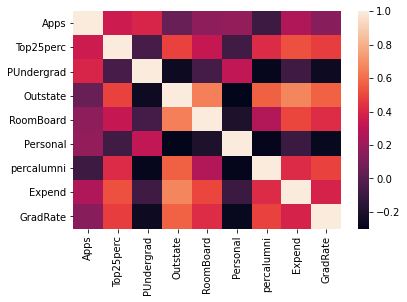

In [24]:
sns.heatmap(ninedata.corr())

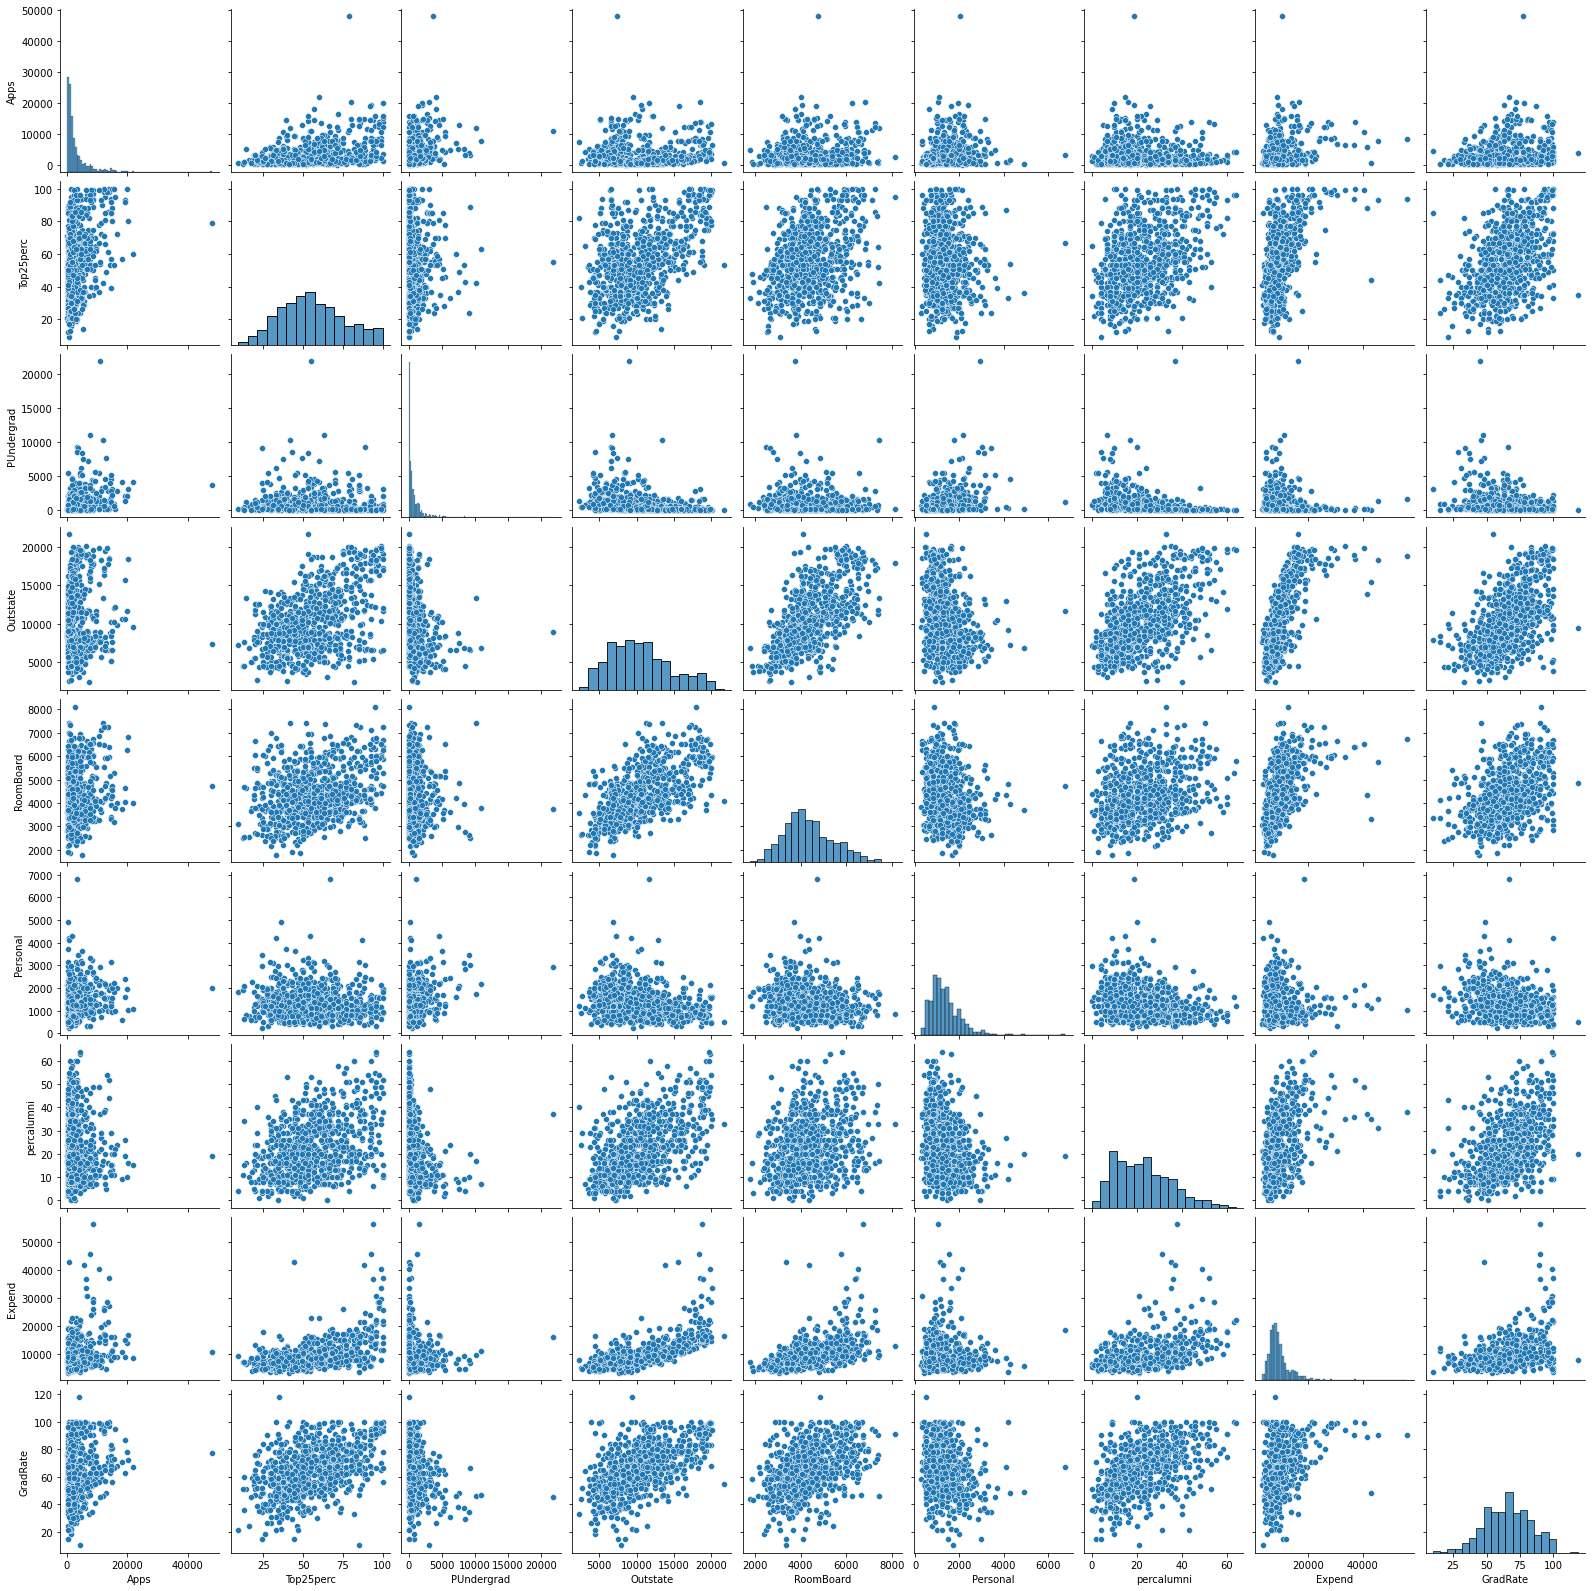

In [25]:
sns.pairplot(ninedata)

### Problem 2 [25]
Denote 'Grad.Rate' by y and the rest of the 8 variables from problem 1 by x. Divide these data sets into training and testing with the 75/25 rule. Then train 3 multiple linear regression models using 3 linear regression packages imported above. Find MSE for testing and training for all the models and report your best model. Finally, add the categorical variable 'Private' to x, then dummy code x. Retrain the best model you had with this new data and report your MSE for testing and training. Do you see any difference?

In [26]:
import sklearn.model_selection as mod_sel
# Linear Regression Packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [27]:
xtrain, xtest, ytrain, ytest = mod_sel.train_test_split(xF, y, test_size = 0.25, random_state = 18)

In [28]:
RLR = LinearRegression().fit(xtrain, ytrain)
LRtrainpred = RLR.predict(xtrain)
LRtestpred = RLR.predict(xtest)

In [29]:
trainmse = metrics.mean_squared_error(ytrain, LRtrainpred)
testmse = metrics.mean_squared_error(ytest, LRtestpred) 

In [30]:
print("RLR train MSE:", trainmse)
print("RLR test MSE:", testmse)

RLR train MSE: 176.98074330064134
RLR test MSE: 116.72847077350389


In [31]:
DTR = DecisionTreeRegressor().fit(xtrain, ytrain)
DTRtrainpred = DTR.predict(xtrain)
DTRtestpred = DTR.predict(xtest)

In [32]:
DTRtrainmse = metrics.mean_squared_error(ytrain, DTRtrainpred)
DTRtestmse = metrics.mean_squared_error(ytest, DTRtestpred) 

In [33]:
print("Decision Tree Train MSE: ", DTRtrainmse)
print("Decision Tree Test MSE: ", DTRtestmse)

Decision Tree Train MSE:  0.0
Decision Tree Test MSE:  282.1897435897436


In [34]:
RF = RandomForestRegressor(n_estimators = 100, random_state = 17)
RFR = RF.fit(xtrain, ytrain)
RFRtrainpred = RFR.predict(xtrain)
RFRtestpred = RFR.predict(xtest)

In [35]:
RFRtrainmse = metrics.mean_squared_error(ytrain, RFRtrainpred)
RFRtestmse = metrics.mean_squared_error(ytest, RFRtestpred)

In [36]:
print("Decision Forest Train MSE: ", RFRtrainmse)
print("Decision Forest Test MSE: ", RFRtestmse)

Decision Forest Train MSE:  26.064988659793816
Decision Forest Test MSE:  122.57284307692309


In [37]:
pd.get_dummies(data['Private'])

,No,Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
772,1,0
773,0,1
774,0,1
775,0,1


In [38]:
ddata = pd.concat([xF, pd.get_dummies(data['Private'])], axis=1)
ddata

,Apps,Top25perc,PUndergrad,Outstate,RoomBoard,Personal,percalumni,Expend,No,Yes
0,1660,52,537,7440,3300,2200,12,7041,0,1
1,2186,29,1227,12280,6450,1500,16,10527,0,1
2,1428,50,99,11250,3750,1165,30,8735,0,1
3,417,89,63,12960,5450,875,37,19016,0,1
4,193,44,869,7560,4120,1500,2,10922,0,1
...,...,...,...,...,...,...,...,...,...,...
772,2197,26,2029,6797,3900,1200,14,4469,1,0
773,1959,47,1107,11520,4960,1250,31,9189,0,1
774,2097,61,166,6900,4200,781,20,8323,0,1
775,10705,99,83,19840,6510,2115,49,40386,0,1


In [39]:
xtrain, xtest, ytrain, ytest = mod_sel.train_test_split(ddata, y, test_size = 0.25, random_state = 18)

In [40]:
RF = RandomForestRegressor(n_estimators = 100, random_state = 17)
RFR = RF.fit(xtrain, ytrain)
RFRtrainpred = RFR.predict(xtrain)
RFRtestpred = RFR.predict(xtest)

In [41]:
RFRtrainmse = metrics.mean_squared_error(ytrain, RFRtrainpred)
RFRtestmse = metrics.mean_squared_error(ytest, RFRtestpred)

In [42]:
print("Decision Forest Train MSE: ", RFRtrainmse)
print("Decision Forest Test MSE: ", RFRtestmse)

Decision Forest Train MSE:  26.20670910652921
Decision Forest Test MSE:  122.7484087179487


There is a slight difference, the test MSE goes from 122.57 down to 122.75 which is slightly worse. The training MSE also went up slightly. I think that this is due to there being both the Yes and No dummie variables in the data. If we were to only add one of the two, we would likely get slightly better results instead of slightly worse, since we are adding two variables that will not be adding much to the data. 

### Problem 3 [25]
Create a new data frame called X from the original college data frame using 8 variables from problem 1 and 'Grad.Rate'. Let Y be the variable 'Private' from the college data frame. Separate X and Y with 80/20 rule into training and testing sets. Train 3 classification models using logistic regression, decision tree, and random forest to classify whether a college is Private or Not. Report training and testing confusion matrices and accuracies for your best model.

In [43]:
X = ddata[xF.columns]
Y = ddata['Yes']

In [44]:
xtrain, xtest, ytrain, ytest = mod_sel.train_test_split(X, Y, test_size = 0.2, random_state = 17)

In [45]:
modelprob = sm.Logit(ytrain,xtrain)
resultsprob = modelprob.fit()
resultsprob.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\Owner\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Owner\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\Owner\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Owner\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                  621
Model:                          Logit   Df Residuals:                      613
Method:                           MLE   Df Model:                            7
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                     inf
Time:                        16:21:45   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Apps          -0.0005    7.5e-05     -6.620      0.000      -0.001      -0.000
Top25perc     -0.0227      0.010     -2.226      0.026      -0.043      -0.003
PUndergrad    -0.0005      0.000     -2.841      0.004      -0.001      -0.000
Outstate       0.0008      0.000      7.095      0.000       0.001       0.001
RoomBoard     -0.0005      0.000     -2.244      0.025      -0.001   -5.77e-05
Personal      -0.0008      0.000     -4.063      0.000      -0.001      -0.000
percalumni     0.0144      0.018      0.788      0.431      -0.021       0.050
Expend      4.669e-05   7.68e-05      0.608      0.543      -0.000       0.000
==============================================================================
"""

In [46]:
cmtrn = resultsprob.pred_table()
cmtrn

array([[125.,  34.],
       [ 16., 446.]])

In [47]:
acctrn = (cmtrn[0,0]+cmtrn[1,1])/len(ytrain)
print("Accuracy for training data:", acctrn.round(5))

Accuracy for training data: 0.91948


In [48]:
yhat_tst = resultsprob.predict(xtest).round(decimals=0)
cmtst = metrics.confusion_matrix(ytest,yhat_tst)
cmtst

array([[42, 11],
       [ 5, 98]], dtype=int64)

In [49]:
acctst = (cmtst[0,0]+cmtst[1,1])/len(ytest)
print("Accuracy for testing data:", acctst.round(5))

Accuracy for testing data: 0.89744


In [50]:
cart = DecisionTreeClassifier()
cartfit = cart.fit(xtrain, ytrain)

In [51]:
train_pred = cartfit.predict(xtrain)
print("Accuracy:",metrics.accuracy_score(ytrain, train_pred))
print("Tree Training Confusion Matrix")
print(confusion_matrix(ytrain, train_pred))

Accuracy: 1.0
Tree Training Confusion Matrix
[[159   0]
 [  0 462]]


In [52]:
cart2 = DecisionTreeClassifier()
treefit = cartfit.fit(xtest, ytest)

In [53]:
test_pred = cart.predict(xtest)
print("Accuracy:",metrics.accuracy_score(ytest, test_pred))
print("Tree Test Confusion Matrix")
print(confusion_matrix(ytest, test_pred))

Accuracy: 1.0
Tree Test Confusion Matrix
[[ 53   0]
 [  0 103]]


In [54]:
RF = RandomForestClassifier(n_estimators = 50, max_features = 2, random_state = 16)
RFfit = RF.fit(xtrain,ytrain)
trainpred_RF = RFfit.predict(xtrain)

In [55]:
metrics.accuracy_score(ytrain, trainpred_RF)
print("RF Training Accuracy: ", metrics.accuracy_score(ytrain, trainpred_RF))

RF Training Accuracy:  0.998389694041868


In [56]:
testpred_RF = RFfit.predict(xtest)

In [57]:
metrics.accuracy_score(ytest, testpred_RF)
print("RF Training Accuracy: ", metrics.accuracy_score(ytest, testpred_RF))

RF Training Accuracy:  0.9102564102564102


### Problem 4 [25]
Create a new data frame called 'features' from the original college data frame using all the variables except 'Name' And 'Private'. Use 'features' to train a KMeans clustering model with $k=4$. Predict the clusters using 'features' and make a list of these clusters. Now define a new column called "Clusters' and add it to the college data frame.
Find out and display which colleges are in clusters 0,1,2, and 3. Find out and display which cluster does Iowa State University belongs to. What do you think these clusters are telling?

In [58]:
L=list(data.columns)[2:18]
x=data[L]
x.head(3)

,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735


In [59]:
#features = data.drop('Private', axis = 1)
#features.head()

In [60]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

In [61]:
print(kmeans.predict(x))

[0 3 0 3 0 3 3 3 3 0 3 3 0 3 0 0 3 0 0 0 2 1 0 1 3 0 0 1 0 3 0 3 0 0 0 0 3
 3 0 1 3 0 0 0 3 0 0 3 3 0 0 0 0 0 0 0 0 0 0 1 3 1 3 0 3 0 0 0 0 1 2 3 3 0
 3 0 0 3 1 1 0 0 0 0 3 0 3 2 0 0 0 3 0 0 3 0 3 0 0 0 3 0 0 0 0 0 3 3 3 0 0
 0 0 0 3 3 0 3 1 0 3 0 3 3 0 0 0 3 3 0 0 0 0 0 0 0 0 3 3 3 3 1 0 0 2 0 0 0
 0 3 3 3 3 0 0 0 0 0 2 3 0 0 3 3 3 0 0 0 0 0 0 3 3 0 2 3 1 0 0 0 0 0 0 0 3
 3 3 0 0 0 0 2 0 0 0 0 3 0 0 0 3 0 0 1 0 3 0 0 0 0 0 0 0 3 0 0 0 0 1 3 0 2
 1 0 0 3 0 3 0 0 3 0 0 0 0 0 0 3 0 3 3 0 3 3 3 0 0 0 0 3 2 3 0 0 3 3 3 3 3
 3 0 0 0 0 0 0 0 0 3 1 3 0 0 0 1 0 0 1 3 1 0 0 0 0 2 0 0 3 1 0 0 0 3 0 0 0
 3 0 3 3 0 3 0 0 0 0 3 0 3 3 0 0 0 3 0 0 0 0 3 0 0 0 0 0 1 0 3 3 0 3 3 3 0
 0 3 0 0 0 3 3 0 0 3 0 3 0 3 0 3 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 3 0 0 0 0 0 0 3 3 0 0 0 0 0 3 0 0 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 0 0 0
 2 0 0 0 0 1 0 0 0 3 0 1 1 1 0 0 0 2 3 0 0 3 3 0 3 1 3 0 0 1 3 0 0 0 3 0 3
 0 1 3 0 0 0 0 0 0 3 0 0 3 0 0 2 3 1 0 0 0 0 0 3 3 3 3 3 3 3 3 0 3 0 0 0 3
 0 0 1 0 0 0 0 0 0 0 0 3 

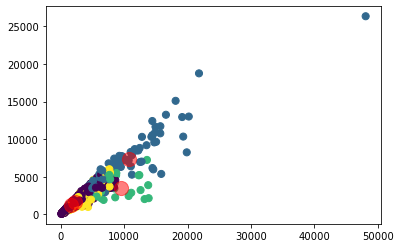

In [62]:
x=np.array(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

In [63]:
data.insert(loc= 2,
          column='clusters',
          value=y_kmeans)
data.head(2)

,Name,Private,clusters,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
0,Abilene Christian University,Yes,0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,3,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [64]:
clusterdata = data.drop('Private', axis = 1)

In [65]:
clusterdata.head(5)

,Name,clusters,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
0,Abilene Christian University,0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,3,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,0,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,0,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [66]:
V = (clusterdata["Name"] == 'Iowa State University')
clusterdata.loc[V]

,Name,clusters,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
277,Iowa State University,1,8427,7424,3441,26,59,18676,1715,7550,3224,640,2055,81,88,19.2,22,8420,65


In [67]:
cluster_counts = clusterdata["clusters"].value_counts()
cluster_counts

0    467
3    208
1     81
2     21
Name: clusters, dtype: int64

In [68]:
group1 = clusterdata['clusters'] == 1
clusterdata.loc[group1]

,Name,clusters,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
21,Appalachian State University,1,7313,4664,1910,20,63,9940,1035,6806,2540,96,2000,83,96,18.3,14,5854,70
23,Arizona State University Main campus,1,12809,10308,3761,24,49,22593,7585,7434,4850,700,2100,88,93,18.9,5,4602,48
27,Auburn University-Main Campus,1,7548,6791,3070,25,57,16262,1716,6300,3933,600,1908,85,91,16.7,18,6642,69
39,Baylor University,1,6075,5349,2367,34,66,9919,484,6450,3920,600,1346,71,76,18.5,38,7503,72
59,Boston University,1,20192,13007,3810,45,80,14971,3113,18420,6810,475,1025,80,81,11.9,16,16836,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,University of Wisconsin at Milwaukee,1,5244,3782,1930,12,37,11561,7443,8786,2964,570,1980,79,87,15.9,8,8094,38
711,Virginia Commonwealth University,1,4963,3497,1567,18,45,10262,5065,10217,4182,500,3630,81,87,8.7,11,11183,45
713,Virginia Tech,1,15712,11719,4277,29,53,18511,604,10260,3176,740,2200,85,89,13.8,20,8944,73
727,Washington State University,1,6540,5839,2440,31,70,14445,1344,8200,4210,800,2719,84,87,16.9,30,10912,56


In [69]:
df3 = clusterdata[(group1)]

In [70]:
df3

,Name,clusters,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
21,Appalachian State University,1,7313,4664,1910,20,63,9940,1035,6806,2540,96,2000,83,96,18.3,14,5854,70
23,Arizona State University Main campus,1,12809,10308,3761,24,49,22593,7585,7434,4850,700,2100,88,93,18.9,5,4602,48
27,Auburn University-Main Campus,1,7548,6791,3070,25,57,16262,1716,6300,3933,600,1908,85,91,16.7,18,6642,69
39,Baylor University,1,6075,5349,2367,34,66,9919,484,6450,3920,600,1346,71,76,18.5,38,7503,72
59,Boston University,1,20192,13007,3810,45,80,14971,3113,18420,6810,475,1025,80,81,11.9,16,16836,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,University of Wisconsin at Milwaukee,1,5244,3782,1930,12,37,11561,7443,8786,2964,570,1980,79,87,15.9,8,8094,38
711,Virginia Commonwealth University,1,4963,3497,1567,18,45,10262,5065,10217,4182,500,3630,81,87,8.7,11,11183,45
713,Virginia Tech,1,15712,11719,4277,29,53,18511,604,10260,3176,740,2200,85,89,13.8,20,8944,73
727,Washington State University,1,6540,5839,2440,31,70,14445,1344,8200,4210,800,2719,84,87,16.9,30,10912,56


In [71]:
df3.describe()

,clusters,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
count,81.0,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,1.0,10794.345679,7408.493827,2970.407407,32.432099,64.086420,15587.407407,3121.617284,8332.037037,4170.246914,598.530864,1876.518519,84.469136,89.938272,16.319753,16.024691,9558.938272,60.925926
std,0.0,6012.842209,3702.402389,1137.030736,17.910847,17.708894,5395.153058,3027.433061,2789.326014,973.792426,116.538522,662.178056,6.190893,5.690663,3.916645,8.477876,3123.496236,14.068385
min,1.0,3580.000000,2603.000000,1483.000000,5.000000,29.000000,8528.000000,114.000000,2340.000000,2540.000000,96.000000,600.000000,70.000000,75.000000,7.800000,5.000000,4602.000000,31.000000
25%,1.0,6986.000000,5254.000000,2181.000000,22.000000,53.000000,11669.000000,1344.000000,6618.000000,3522.000000,504.000000,1360.000000,80.000000,87.000000,13.200000,10.000000,7503.000000,54.000000
50%,1.0,9402.000000,6732.000000,2678.000000,27.000000,62.000000,14130.000000,2246.000000,7706.000000,3990.000000,600.000000,1851.000000,85.000000,90.000000,16.900000,15.000000,8811.000000,63.000000
75%,1.0,14292.000000,8683.000000,3409.000000,37.000000,78.000000,17880.000000,3822.000000,9556.000000,4598.000000,687.000000,2210.000000,89.000000,94.000000,19.200000,20.000000,11006.000000,70.000000
max,1.0,48094.000000,26330.000000,6392.000000,95.000000,100.000000,31643.000000,21836.000000,18420.000000,7425.000000,860.000000,3630.000000,96.000000,100.000000,24.700000,48.000000,17007.000000,98.000000


In [72]:
group0 = clusterdata['clusters'] == 0
df4 = clusterdata[(group0)]
df4

,Name,clusters,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
0,Abilene Christian University,0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
2,Adrian College,0,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
4,Alaska Pacific University,0,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
9,Alderson-Broaddus College,0,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52
12,Allentown Coll. of St. Francis de Sales,0,1179,780,290,38,64,1130,638,9690,4785,600,1000,60,84,13.3,21,7940,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,Wofford College,0,1501,935,273,51,83,1059,34,12680,4150,605,1440,91,92,15.3,42,7875,75
772,Worcester State College,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,0,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,0,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49


In [73]:
df4.describe()

,clusters,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
count,467.0,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,0.0,1665.312634,1199.706638,501.379015,20.175589,47.835118,2330.372591,724.963597,8418.036403,3953.415418,531.398287,1368.929336,65.541756,73.062099,15.061028,19.483940,7287.149893,60.597430
std,0.0,1606.361369,1027.260795,446.155528,10.938141,16.493353,2279.320265,1056.795933,2407.532028,910.614323,149.761168,648.434160,14.697080,14.214120,3.706476,10.351404,1734.378542,16.736939
min,0.0,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,3.000000,2580.000000,1780.000000,110.000000,250.000000,10.000000,24.000000,2.500000,0.000000,3186.000000,10.000000
25%,0.0,593.000000,481.500000,206.500000,12.000000,36.000000,869.500000,132.500000,6550.000000,3355.000000,450.000000,905.000000,56.000000,64.000000,12.600000,11.000000,6199.000000,50.000000
50%,0.0,1006.000000,802.000000,334.000000,19.000000,47.000000,1337.000000,414.000000,8640.000000,3840.000000,500.000000,1260.000000,67.000000,75.000000,14.500000,18.000000,7307.000000,60.000000
75%,0.0,2108.000000,1594.500000,653.500000,25.000000,58.000000,2921.500000,870.000000,10453.000000,4500.000000,600.000000,1700.000000,76.000000,83.000000,17.100000,26.000000,8372.000000,71.000000
max,0.0,8598.000000,5293.000000,3147.000000,67.000000,99.000000,11493.000000,9310.000000,13320.000000,7398.000000,2000.000000,4913.000000,103.000000,100.000000,39.800000,53.000000,16352.000000,118.000000


In [74]:
group3 = clusterdata['clusters'] == 3
df5 = clusterdata[(group3)]
df5

,Name,clusters,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
1,Adelphi University,3,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
3,Agnes Scott College,3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
5,Albertson College,3,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,3,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,3,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,Widener University,3,2139,1492,502,24,64,2186,2171,12350,5370,500,1350,88,86,12.6,19,9603,63
760,Willamette University,3,1658,1327,395,49,80,1595,159,14800,4620,400,790,91,94,13.3,37,10779,68
763,Williams College,3,4186,1245,526,81,96,1988,29,19629,5790,500,1200,94,99,9.0,64,22014,99
769,Wittenberg University,3,1979,1739,575,42,68,1980,144,15948,4404,400,800,82,95,12.8,29,10414,78


In [75]:
group2 = clusterdata['clusters'] == 2
df6 = clusterdata[(group2)]
df6

,Name,clusters,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
20,Antioch University,2,713,661,252,25,44,712,23,15476,3336,400,1100,69,82,11.3,35,42926,48
70,Brown University,2,12586,3239,1462,87,95,5643,349,19528,5926,720,1100,99,100,7.6,39,20440,97
87,Carnegie Mellon University,2,8728,5201,1191,60,89,4265,291,17900,5690,450,1250,86,93,9.2,31,24386,74
144,Columbia University,2,6756,1930,871,78,96,3376,55,18624,6664,550,300,97,98,5.9,21,30639,99
158,Dartmouth College,2,8587,2273,1087,87,99,3918,32,19545,6070,550,1100,95,99,4.7,49,29619,98
174,Duke University,2,13789,3893,1583,90,98,6188,53,18590,5950,625,1162,95,96,5.0,44,27206,97
191,Emory University,2,8506,4168,1236,76,97,5544,192,17600,6000,600,870,97,98,5.0,28,28457,96
221,Georgetown University,2,11115,2881,1390,71,93,5881,406,18300,7131,670,1700,91,92,7.2,27,19635,95
250,Harvard University,2,13865,2165,1606,90,100,6862,320,18485,6410,500,1920,97,97,9.9,52,37219,100
284,Johns Hopkins University,2,8474,3446,911,75,94,3566,1569,18800,6740,500,1040,96,97,3.3,38,56233,90


The clusters are trying to balance all of the featues of the data to try and group colleges together based on them the best that it can, but what stands out to me the most when looking at the groups is that group 0 is basically a catch all from the rest of the school. Group 1 is mostly state schools that are fairly large. Group 2 looks to be ivy leage schools and private schools that are typically more academically accreddited. Group 3 is other private schools from my google searches on them, but perhaps they are smaller. 

I would say that overall, the clusters are sorting the colleges into large public schools, small public schools, large private schools, and small private schools. There is probably some error since these are not the only factors in clustering, so some are in the wrong category, but I would say that many of the variables that are used in the data set would lead to these groupings. 

Private schools and public schools are going to cost differently, have different acceptance, enrollment, and amount of different students in undergrad, phd, be in the tops of their class, and some other factors, but if I had to group colleges based off of these things into 4 groups, I think that would make the most sense. 